In [1]:
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

# Tokenization

In [2]:
#open file and convert it to lower case
tom_swayer_file = open("shakespeare.txt", "r", encoding="utf8")
tom_swayer = tom_swayer_file.read()
tom_swayer_lower = tom_swayer.lower()

#remove all special characters except - and _
special_chars = re.compile('[`~!@#$%^&*()+={}|\[\]:";<>?,\./“”]')
tom_swayer_lower = special_chars.sub("", tom_swayer_lower)

#tokenize using word_tokenizer
tokens_list = word_tokenize(tom_swayer_lower)
tokens_list = [i for i in tokens_list if len(re.findall('[a-z0-9]', i))!=0]
tokens = len(tokens_list)

tom_swayer_file.close()

#count the number of times each token appears and save it in dictionary
token_count = {}
counter = 0
unique_words = []
for i in tokens_list:
    if (i in token_count.keys()):
        token_count[i] += 1
    else:
        token_count[i] = 1
    
    #count types after every 500 tokens for Heap's law
    if (counter%500 == 0):
        unique_words.append(len(token_count.keys()))
    counter += 1
        
unique_words = unique_words[1:]
types = len(token_count.keys())
ttr = types/tokens

print ("The total number of tokens are : ", tokens)
print ("Different types of tokens are : ", types)
print ("The TTR (Type by Tokens Ratio) is :", ttr)

The total number of tokens are :  920565
Different types of tokens are :  30318
The TTR (Type by Tokens Ratio) is : 0.03293412197943654


In [3]:
#convert dict to list and sort using frequency
token_ranks = []
for i in token_count:
    token_ranks.append([i, token_count[i]])
    
token_ranks.sort(key = lambda x:x[1], reverse = True)

print (token_ranks[:20])

[['the', 27594], ['and', 26706], ['i', 22445], ['to', 19177], ['of', 18171], ['a', 14483], ['you', 13767], ['my', 12461], ['that', 11492], ['in', 10984], ['is', 10976], ['not', 9448], ['for', 8236], ['with', 7991], ['me', 7705], ['it', 7687], ["'s", 7451], ["'d", 7199], ['be', 7063], ['your', 6871]]


# Zipf's Law : First Statement

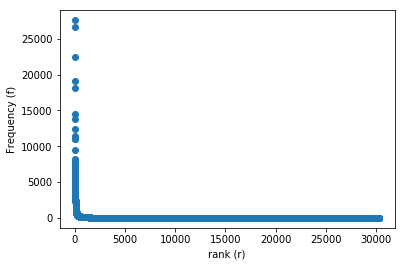

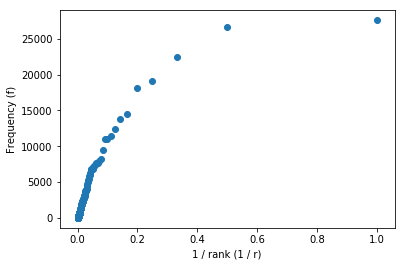

In [4]:
plt.scatter([i for i in range(1,types+1)], [token_ranks[i][1] for i in range(types)])
plt.ylabel('Frequency (f)')
plt.xlabel('rank (r)')
plt.show()
plt.scatter([i**-1 for i in range(1,types+1)], [token_ranks[i][1] for i in range(types)])
plt.ylabel('Frequency (f)')
plt.xlabel('1 / rank (1 / r)')
plt.show()

The plot of frequency vs 1/rank of tokens is somewhat a straight line (with 3 or 4 outliers) which verifies the 1st statement of Zipf's Law which says frequency of tokens is proportional to 1/rank of the tokens.

# Heap's Law

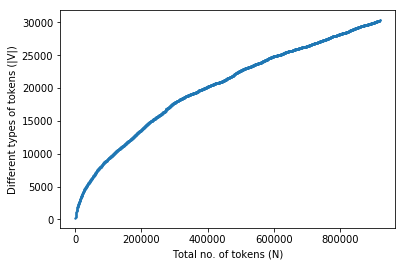

In [5]:
plt.scatter([(i+1)*500 for i in range(len(unique_words))], [i for i in unique_words], s=2)
plt.ylabel('Different types of tokens (|V|)')
plt.xlabel('Total no. of tokens (N)')
plt.show()

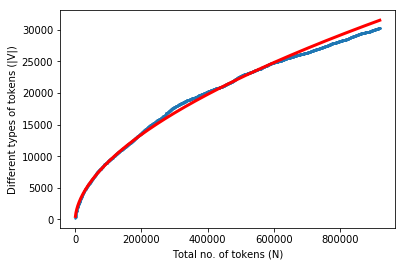

In [6]:
#take log of the equation to get it in linearr format and apply a linear regression to get k and b
model = linear_model.LinearRegression()
model.fit([[math.log((i+1)*500)] for i in range(len(unique_words))], [math.log(i) for i in unique_words])

k = math.exp(model.intercept_)
b = model.coef_

prediction = [k*(((i+1)*500)**b[0]) for i in range(len(unique_words))]
plt.scatter([(i+1)*500 for i in range(len(unique_words))], [i for i in unique_words], s=2)
plt.plot([(i+1)*500 for i in range(len(unique_words))] ,prediction, color='red', linewidth=3)
plt.ylabel('Different types of tokens (|V|)')
plt.xlabel('Total no. of tokens (N)')
plt.show()


In [7]:
print ("The value of K and b in the expression |V| = KN^b is", k , ",", b[0], "respectively.")

The value of K and b in the expression |V| = KN^b is 14.662214757638907 , 0.5586975972655581 respectively.


The plot of volume of text (total number of tokens) (|V|) to different types of tokens (N) is very similar to graphs of type y = kx^b with k and b here estimated to be 14.66 and 0.55 respectively. This is in accordance to the Heap's Law which state |V| = kN^b where k lies between 10 and 100 and b lies between 0.4 and 0.6, hence verifying Heap's Law.

# Zipf's Law : Second Statement

In [8]:
#read the meanings file
meanings_file = open("words.txt", "r", encoding="utf8")
meanings = meanings_file.readlines()

#take any small number of token types to find # of meanings
meanings = [i for i in meanings if (i.isupper() or i[0].isnumeric())]
token_meanings = [[token_ranks[i][0],token_ranks[i][1],i+1] for i in range(25)] + [[token_ranks[i*100][0],token_ranks[i*100][1],i*100+1] for i in range(1, int(len(token_ranks)/100))]


#count # of meanings of the token type
for i in range(len(token_meanings)):
    word = token_meanings[i][0]
    f = 0
    total = 0
    counter = 0
    for line in meanings:
        if (line.split() != []):
            if (f == 1):
                if (re.match('[0-9].', line.split()[0]) is not None):
                    counter += 1
                elif (len(re.findall(r'[a-z0-9]', line)) == 0):
                    f = 0
                    if (counter == 0):
                        counter = 1
                    total += counter
                    counter = 0
                if (word.upper() == line.replace(";", "").strip()):
                    f = 1
                if (f == 0):
                    break
            if (word.upper() == line.replace(";", "").strip()):
                f = 1

    token_meanings[i].append(total)

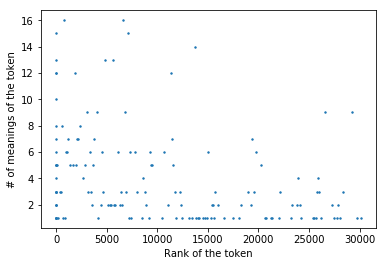

In [9]:
token_meanings = [i for i in token_meanings if i[3] != 0]
rank = [i[2] for i in token_meanings]
meanings = [i[3] for i in token_meanings]

plt.scatter(rank, meanings, s=2)
plt.ylabel('# of meanings of the token')
plt.xlabel('Rank of the token')
plt.show()

The plot of number of meanings of token (m) and it's rank (r) might seem a little random but on observation we can see a pattern similar to type of y = kx^-0.5 which verifies the second statement of Zipf's Law which states m is inversely proportional to r^0.5

# Zipf's Law : Third Statement

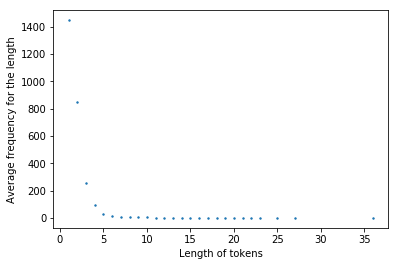

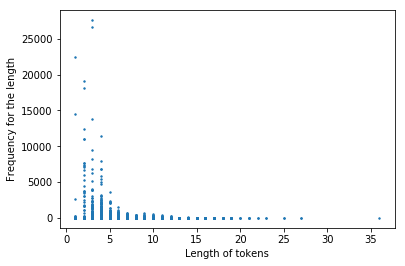

In [10]:
length = [len(i[0]) for i in token_ranks]

#find the average frequency for each length of tokens
freq = {}
for i in token_ranks:
    if (len(i[0]) in freq.keys()):
        freq[len(i[0])].append(i)
    else:
        freq[len(i[0])] = [i]

avg_freq = []
for i in freq:
    s = 0
    for j in range(len(freq[i])):
        s = s + freq[i][j][1]
    s = s/len(freq[i])
    avg_freq.append([i, s])
        
plt.scatter([i for i,j in avg_freq], [j for i,j in avg_freq], s=2)
plt.ylabel('Average frequency for the length')
plt.xlabel('Length of tokens')
plt.show()
plt.scatter(length, [i[1] for i in token_ranks], s=2)
plt.ylabel('Frequency for the length')
plt.xlabel('Length of tokens')
plt.show()

The plot of average frequency for length (f) and the length (l) is very similar to the type y = kx^-1 which verifies the third statement of Zipf's Law which states f is inversely proportional to l.